In [194]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

# DataFrame 활용

In [3]:
num = ['1번', '2번', '3번', '4번', '5번', '6번', '7번', '8번']
name = ['채치수', '정대만', '송태섭', '서태웅', '강백호', '변덕규', '황태산', '윤대협']
school = ['북산', '북산', '북산', '북산', '북산', '능남', '능남', '능남']
height = [197, 184, 168, 187, 188, 202, 188, 190]
korean = [90, 40, 80, 40, 15, 80, 55, 100]
eng = [85, 35, 75, 60, 20, 100, 65, 85]
math = [100, 50, 70, 70, 10, 95, 45, 90]
science = [95, 55, 80, 75, 35, 85, 40, 95]
society = [85, 25, 75, 80, 10, 80, 35, 95]
sw = ['Python', 'Java', 'Javascript', np.NaN, np.NaN, 'C', 'Python', 'C#']

df = pd.DataFrame([num, name, school, height, korean, eng, math, science, society, sw]).T
df.columns = ['지원번호', '이름', '학교', '키', '국어', '영어', '수학', '과학', '사회', 'SW']

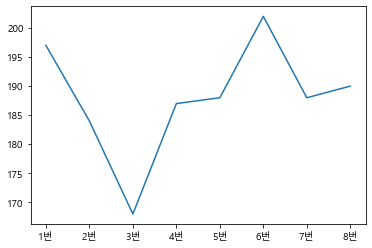

In [30]:
plt.plot(df['지원번호'], df['키'])

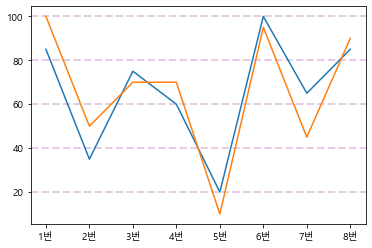

In [41]:
plt.plot(df['지원번호'], df['영어'])
plt.plot(df['지원번호'], df['수학'])

plt.grid(axis = 'y', # axis = 'x' or 'y'
         color = 'purple', # color 적용 가능
         alpha = 0.2, # 투명도 조절 가능
         linewidth = 2, # 두께 조절 가능
         linestyle = '--')

# 누적 막대 그래프

<BarContainer object of 8 artists>

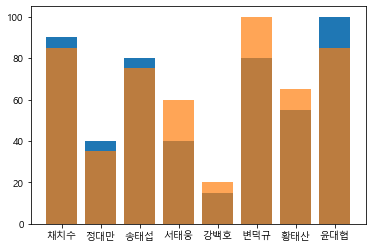

In [48]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'], alpha = 0.7) # 겹쳐서 그려진다.

<BarContainer object of 8 artists>

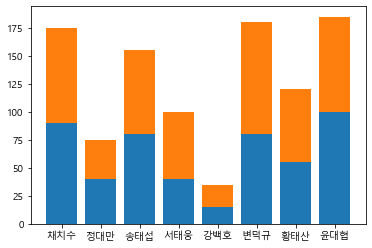

In [54]:
plt.bar(df['이름'], df['국어'])
plt.bar(df['이름'], df['영어'], bottom = df['국어'])

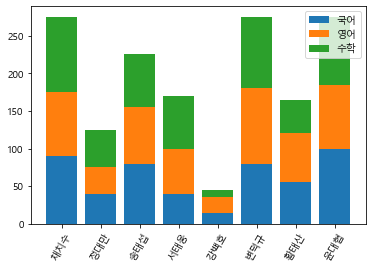

In [64]:
plt.bar(df['이름'], df['국어'],label = '국어')
plt.bar(df['이름'], df['영어'], bottom = df['국어'], label = '영어')
plt.bar(df['이름'], df['수학'], bottom = df['국어'] + df['영어'], label = '수학')

plt.xticks(rotation = 60)
plt.legend(loc = 'upper right')

plt.show()

# 다중 막대 그래프

N: 8
index: [0 1 2 3 4 5 6 7]


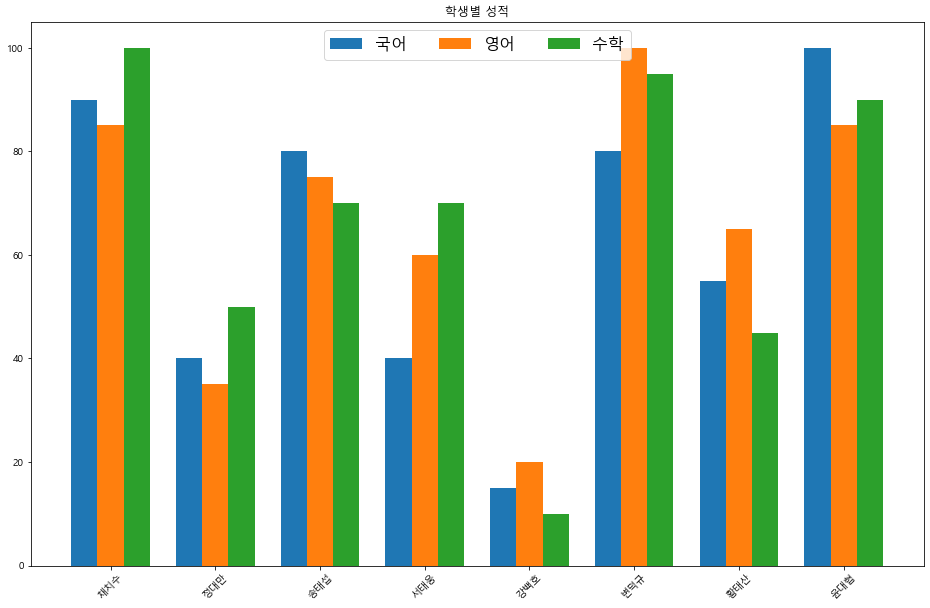

In [96]:
N = df.shape[0]
print('N:', N)

index = np.arange(N)
print('index:', index)

width = 0.25

plt.figure(figsize = (16, 10))

plt.bar(index-width, df['국어'], width = width, label = '국어')
plt.bar(index, df['영어'], width = width, label = '영어')
plt.bar(index+width, df['수학'], width = width, label = '수학')

plt.title('학생별 성적')
plt.xticks(df.index, df['이름'], rotation = 45)
plt.legend(ncol = 3, loc = 'upper center', fontsize = 16)

plt.show()

# 히스토그램

In [14]:
plt.style.use('ggplot') # default

In [24]:
mu = 100
sigma = 10
np.random.seed(0)
x = np.random.normal(mu, sigma, 10000)

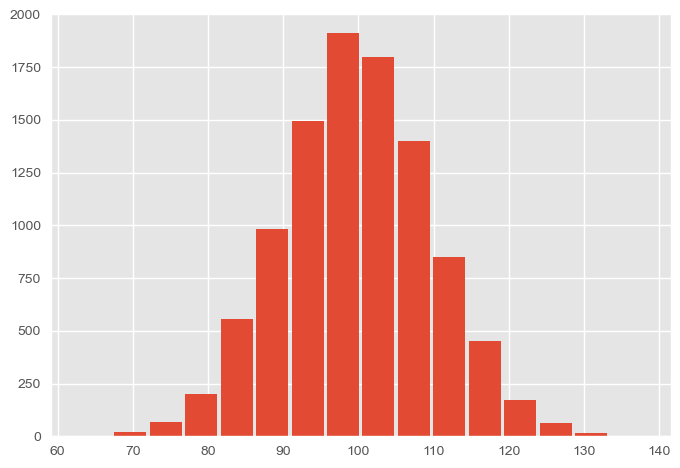

In [26]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
ax.hist(x, rwidth = 0.9, bins = 16)

plt.show()

In [31]:
base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')

df = pd.read_csv(anime_master_csv, index_col = 'anime_id')

In [36]:
df['rating']

anime_id
32281    9.37
5114     9.26
28977    9.25
9253     9.17
9969     9.16
         ... 
11095    6.06
7808     6.47
28543    5.83
18967    6.13
13455    7.00
Name: rating, Length: 10075, dtype: float64

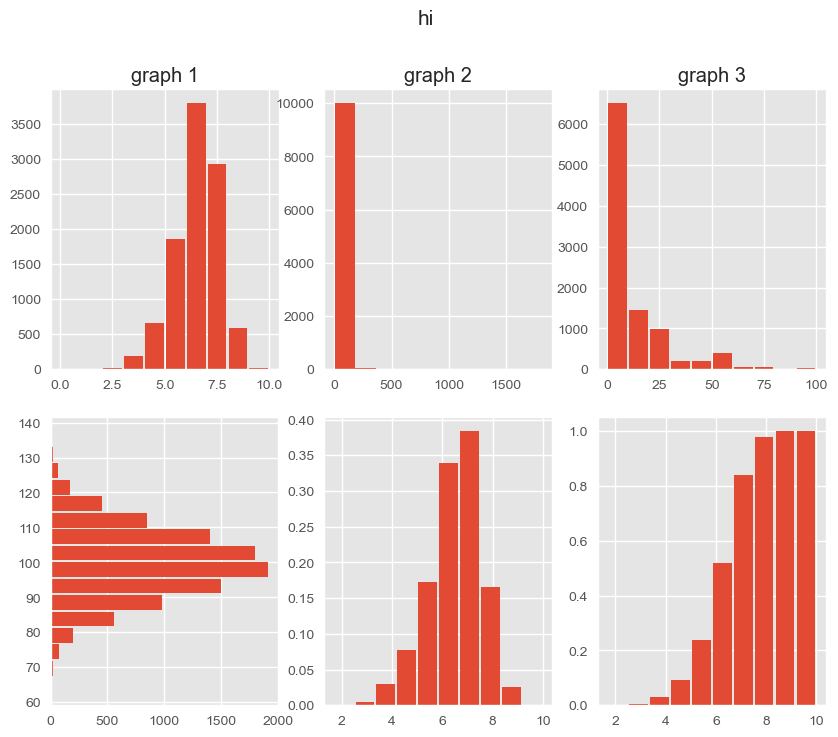

In [79]:
fig = plt.figure(figsize = (10, 8))

gs = fig.add_gridspec(nrows = 1, ncols = 3,
                      bottom = 0.53)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

ax1.hist(df['rating'], range = (0, 10), rwidth = 0.9)
ax2.hist(df['episodes'])
ax3.hist(df['episodes'], rwidth = 0.9, range = (0, 100))

ax1.set_title('graph 1')
ax2.set_title('graph 2')
ax3.set_title('graph 3')
fig.suptitle('hi', fontsize = 15)


np.random.seed(0)
x = np.random.normal(100, 10, 10000)

gs2 = fig.add_gridspec(nrows = 1, ncols = 3,
                       top = 0.47)

ax1 = fig.add_subplot(gs2[0, 0])
ax2 = fig.add_subplot(gs2[0, 1])
ax3 = fig.add_subplot(gs2[0, 2])

# 수평 히스토그램
ax1.hist(x, rwidth = 0.9, bins = 16, orientation = 'horizontal')
# 상대도수
ax2.hist(df['rating'], density = True, rwidth = 0.9)
# 누적도수
ax3.hist(df['rating'], density = True, cumulative = True, rwidth = 0.9)

plt.show()

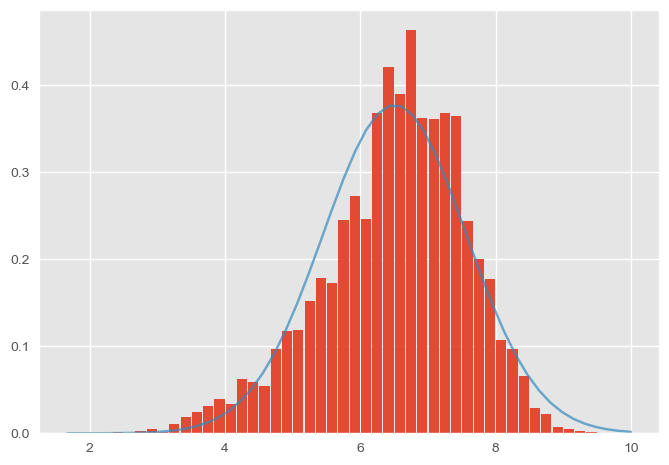

In [112]:
from scipy.stats import norm

# 근사곡선!
bins = 50
df_min = np.min(df['rating'])
df_max = np.max(df['rating'])

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(df['rating'],
        bins = bins,
        range = (df_min, df_max),
        density = True,
        rwidth = 0.9)

# 평균과 표준편차 계산
mu, sigma = df['rating'].mean(), df['rating'].std()

x = np.linspace(df_min, df_max, bins)
# y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))
y = norm.pdf(x = x, loc = mu, scale = sigma)

ax.plot(x, y, alpha = 0.7)

plt.show()

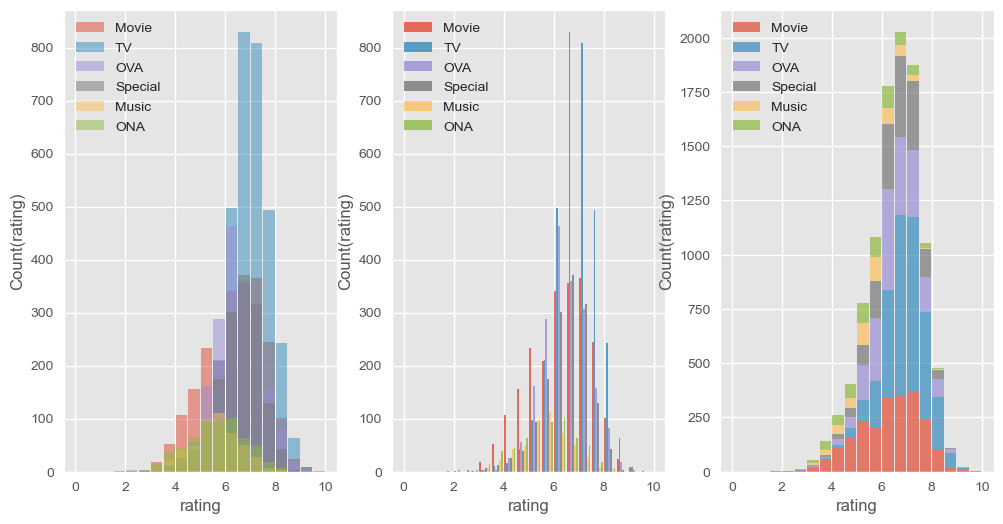

In [134]:
# 여러 그룹을 겹쳐서 그리기 - 단순하게 하나의 subplot에 여러개의 그래프를 출력하는 것
# 비교군들의 분포를 한 번에 겹쳐서 확인할 때 사용
# 예시에서는 시청 매체별로 점수 분포를 확인하는 작업
types = df['type'].unique()
labels = types.tolist()

fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax1.hist(df.loc[df['type'] == t, 'rating'],
             bins = b_num,
             rwidth = 0.9,
             alpha = 0.5,
             label = t)
    
ax1.legend()
ax1.set_xlabel('rating')
ax1.set_ylabel('Count(rating)')

# 여러 그룹을 나열하여 그리기
# 비교군이 너무 많을 경우, 겹쳐 그리게 되면 가시성이 너무 떨어진다. 이럴 경우 나열하여 비교하는 방식을 사용할 수 있다.
ax2.hist(dataset,
         bins = np.arange(0, 10.5, 0.5),
         rwidth = 0.9,
         alpha = 0.8,
         label = labels)

ax2.legend()
ax2.set_xlabel('rating')
ax2.set_ylabel('Count(rating)')

# 전체 분포와 비교하여 확인하고 싶은 경우, 누적 히스토그램을 그리면 유용하다.
ax3.hist(dataset,
         bins = np.arange(0, 10.5, 0.5),
         rwidth = 0.9,
         alpha = 0.7,
         label = labels,
         stacked = True)

ax3.legend()
ax3.set_xlabel('rating')
ax3.set_ylabel('Count(rating)')

plt.show()

# 상자수염 그래프 (Box Plot)

데이터의 불균형을 확인할 때 유용한 그래프로, 데이터 분석 초기에 아웃라이어 검출 등을 진행할 때 일반적으로 사용한다.
- 중앙값
- 제1사분위점
- 제3사분위점
- IQR(사분위 범위) : Q3 - Q1
- 상하부 끝 : Q3 + 1.5 * IQR / Q1 - 1.5 & IQR

6.666666666666667 3.0


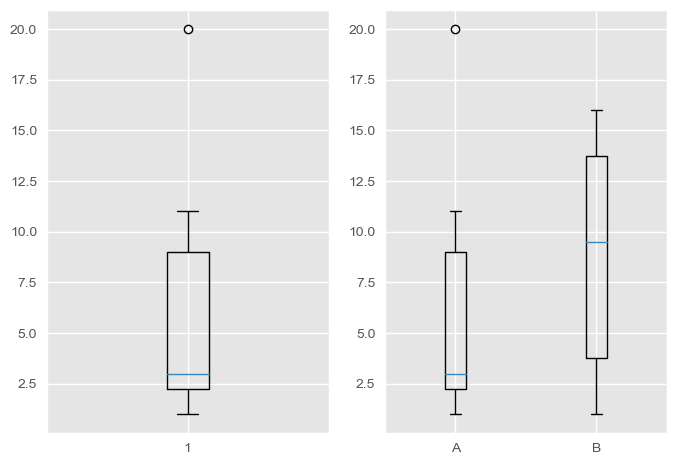

In [143]:
x = [1, 2, 3, 3, 11, 20]
y = [[1, 2, 3, 3, 11, 20], [1, 2, 9, 10, 15, 16]]
labels = ['A', 'B']

print(np.mean(x), np.median(x))

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(x)

ax2.boxplot(y, labels = labels)

plt.show()

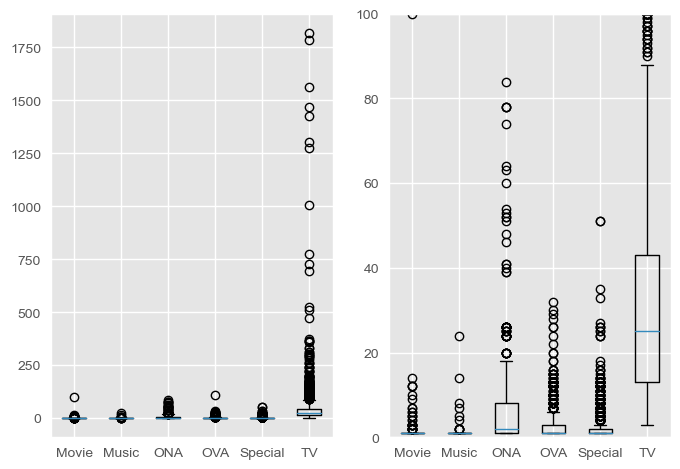

In [154]:
labels = []
types_list = []

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.boxplot(types_list, labels = labels)

ax2.boxplot(types_list, labels = labels)
ax2.set_ylim(0, 100)

plt.show()

In [158]:
df['episodes'][df['type'] == 'TV'].describe().round(1)

count    3330.0
mean       37.5
std        83.3
min         3.0
25%        13.0
50%        25.0
75%        43.0
max      1818.0
Name: episodes, dtype: float64

In [163]:
# boxplot 서식 정하기
np.random.seed(3)
dataset = [np.random.normal(20 + mu, 5, 1000) for mu in range(1, 5)]

In [176]:
# 벗어난 값의 서식 사전
flier_prop = {
                'color': '#EC407A',
                'marker': 'o',
                'markerfacecolor': '#2196F3',
                'markeredgecolor': 'white',
                'markersize': 5,
                'linestyle': 'None',
                'linewidth': 0.1
}

# 상자의 서식 사전
box_prop = {
            'color': '#2196F3',
            'facecolor': '#BBDEFB',
            'linewidth': 1,
            'linestyle': '-'
}

# 수염의 서식 사전
whisker_prop = {
                'color': '#2196F3',
                'linewidth': 1,
                'linestyle': '--'
}

# 수염 끝단 서식 사전
cap_prop = {
            'color': '#2196F3',
            'linewidth': 1,
            'linestyle': '--'
}

# 중앙값 서식 사전
median_prop = {
                'color': '#2196F3',
                'linewidth': 2,
                'linestyle': '-'
}

# 평균값 서식 사전
mean_prop = {
                'color': '#2196F3',
                'marker': '^',
                'markerfacecolor': '#2196F3',
                'markeredgecolor': 'white',
                'markersize': 10,
                'linewidth': 1,
                'linestyle': ''
}

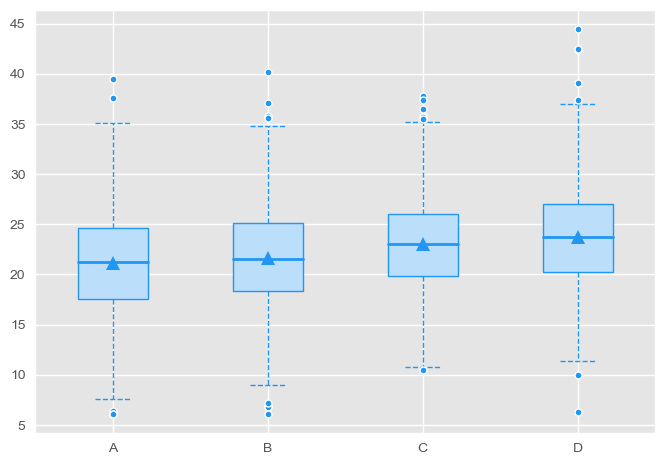

In [179]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(dataset,
           patch_artist = 'Patch',
           labels = ['A', 'B', 'C', 'D'],
           showmeans = True,
           
           flierprops = flier_prop,
           boxprops = box_prop,
           whiskerprops = whisker_prop,
           capprops = cap_prop,
           medianprops = median_prop,
           meanprops = mean_prop
           )

plt.show()

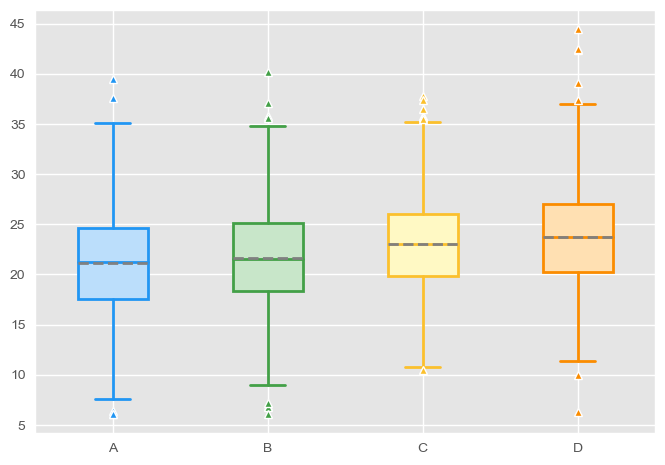

In [191]:
# 상자마다 서식 설정하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

bp = ax.boxplot(
                dataset,
                patch_artist = 'Patch',
                labels = ['A', 'B', 'C', 'D'],
                meanline = True,
                showmeans = True
)

# 컬러 세트
colors1 = ['#2196F3', '#43A047', '#FBC02D', '#FB8C00']
colors2 = ['#BBDEFB', '#C8E6C9', '#FFF9C4', '#FFE0B2']
n = [0, 0, 1, 1, 2, 2, 3, 3]

# 서식 설정 - set_ 의 사용
for params in zip(bp['boxes'], bp['fliers'], bp['medians'], colors1, colors2):
    bp_boxes, bp_fliers, bp_med, color1, color2 = params
    
    # 상자 서식 설정
    bp_boxes.set_color(color1)
    bp_boxes.set_facecolor(color2)
    bp_boxes.set_linewidth(2)
#     bp_boxes.set(color = color1,
#                  facecolor = color2,
#                  linewidth = 2)
    
    # 아웃라이어 서식 설정
    bp_fliers.set(marker = '^',
                  color = color2,
                  markeredgecolor = 'white',
                  markerfacecolor = color1)
    
    # 중앙값 서식 설정
    bp_med.set(color = color1,
               linewidth = 2)
    
# 수염과 끝난 서식 설정
for bp_cap, bp_whisker, m in zip(bp['caps'], bp['whiskers'], n):
    bp_cap.set_color(colors1[m])
    bp_cap.set_linewidth(2)
    
    bp_whisker.set_color(colors1[m])
    bp_whisker.set_linewidth(2)
    
# 평균값 서식 설정
for mean, color2 in zip(bp['means'], colors2):
    mean.set_color('grey')
    mean.set_linewidth(2)
    mean.set_linestyle('--')
    
plt.show()

# 원 그래프

각 요소의 비율을 비교할 때 이용하는 그래프

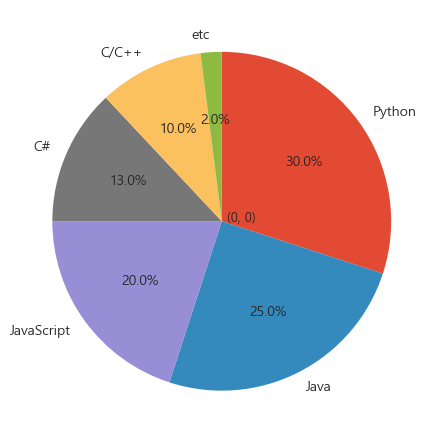

In [221]:
values = [30, 25, 20, 13, 10, 2]
labels = ['Python', 'Java', 'JavaScript', 'C#', 'C/C++', 'etc']

# plt.pie(values,
#         labels = labels,
#         autopct = '%.1f%%',
#         startangle = 90,
#         counterclock = False)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.pie(values,
       labels = labels,
       radius = 1.0,
#        frame = True,
       autopct = '%.1f%%',
       startangle = 90,
       counterclock = False
      )
ax.text(0.03, 0, '(0, 0)', fontsize = 9)

plt.show()

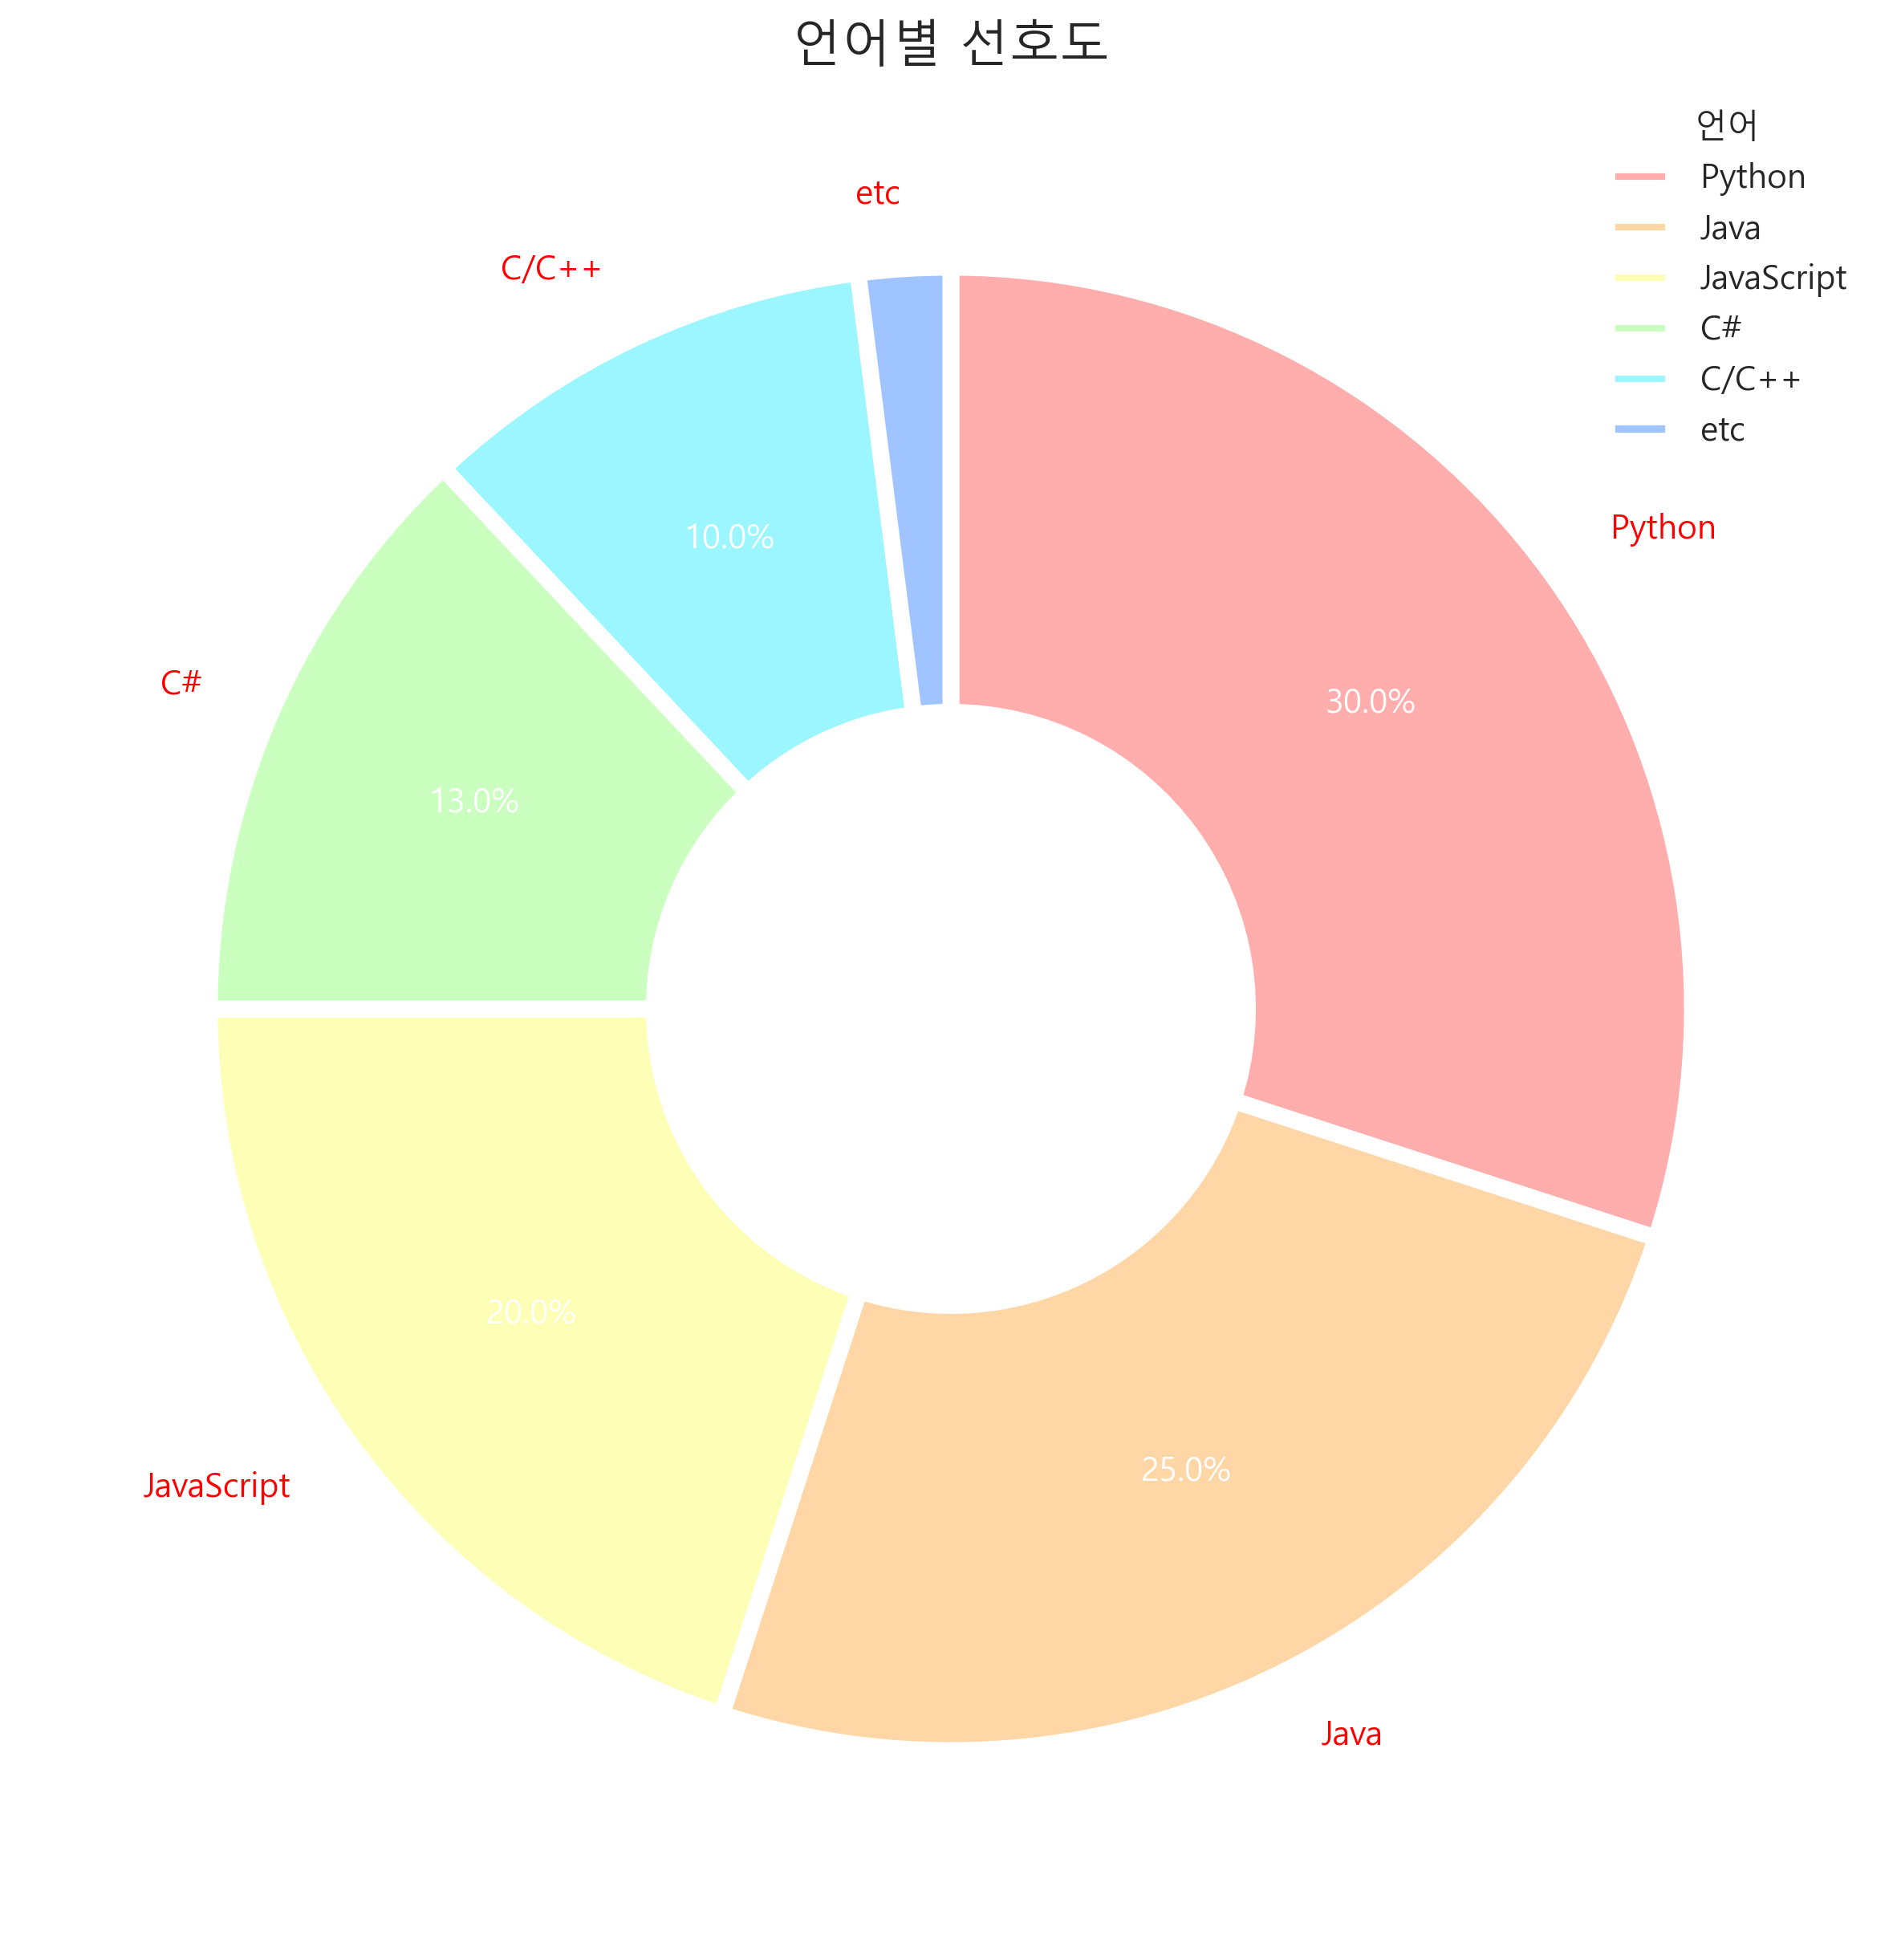

In [230]:
values = [30, 25, 20, 13, 10, 2]
labels = ['Python', 'Java', 'JavaScript', 'C#', 'C/C++', 'etc']
explode = [0.05, 0.02, 0, 0, 0, 0] # 파이 사이에 이격 거리 지정 가능
colors = ['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#9bf6ff', '#a0c4ff'] # 파이 색깔 지정 가능
wedgeprops = {'width': 0.6,
              'edgecolor': 'w',
              'linewidth': 5}

def custom_autopct(pct):
    return ('%.1f%%' % pct) if pct >= 10 else ''

plt.figure(figsize = (16, 10), dpi = 300)

patches, texts, autotexts = plt.pie(values,
                                    labels = labels,
#                                     explode = explode,
                                    autopct = custom_autopct,
                                    startangle = 90,
                                    counterclock = False,
                                    colors = colors,
                                    wedgeprops = wedgeprops, # 외부 선 두께를 통해 도넛 차트 형태로 표현
                                    pctdistance = 0.7
                                   ) # 폰트 색도 변경 가능한가?

[text.set_color('red') for text in texts]
[autotext.set_color('w') for autotext in autotexts]

plt.title('언어별 선호도', fontsize = 15)
plt.legend(title = '언어', loc = 'upper right')

plt.show()

### DataFrame 활용

In [18]:
grp = df.groupby(['학교'])

([<matplotlib.patches.Wedge at 0x2a0048d4640>,
 [Text(0.42095177560159885, 1.0162674857624154, '능남'),
  Text(-0.4209517756015994, -1.0162674857624152, '북산')])

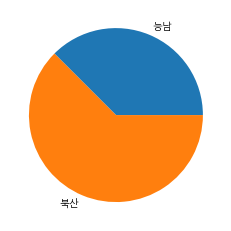

In [44]:
values = list(grp.size().values)
labels = list(grp.size().index)

plt.pie(values, labels = labels)

# 산점도

In [49]:
# 영어, 수학 성적의 분포 확인

df['학년'] = [3, 3, 2, 1, 1, 3, 2, 2]

display(df)

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW,학년
0,1번,채치수,북산,197,90,85,100,95,85,Python,3
1,2번,정대만,북산,184,40,35,50,55,25,Java,3
2,3번,송태섭,북산,168,80,75,70,80,75,Javascript,2
3,4번,서태웅,북산,187,40,60,70,75,80,NaN,1
4,5번,강백호,북산,188,15,20,10,35,10,NaN,1
5,6번,변덕규,능남,202,80,100,95,85,80,C,3
6,7번,황태산,능남,188,55,65,45,40,35,Python,2
7,8번,윤대협,능남,190,100,85,90,95,95,C#,2


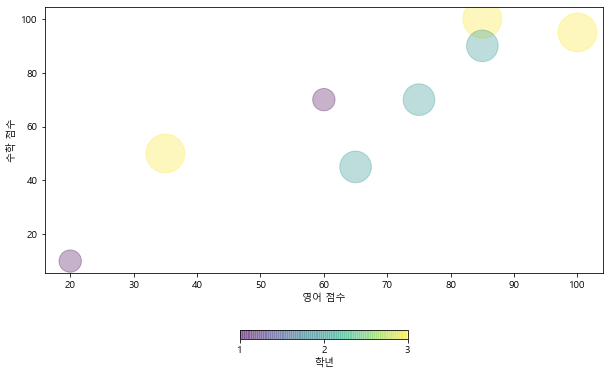

In [63]:
sizes = df['학년'] * 500

plt.figure(figsize = (10, 7))

plt.scatter(df['영어'], df['수학'],
            s = sizes,
            c = df['학년'],
            cmap = 'viridis',  # matplotlib cmap 확인
            alpha = 0.3,
           )

plt.xlabel('영어 점수') 
plt.ylabel('수학 점수')
plt.colorbar(ticks = [1, 2, 3],
             label = '학년',
             shrink = 0.3,
             orientation = 'horizontal',
            )

plt.show()

# 여러개의 그래프

Text(0.5, 0.98, '여러 그래프 넣기')

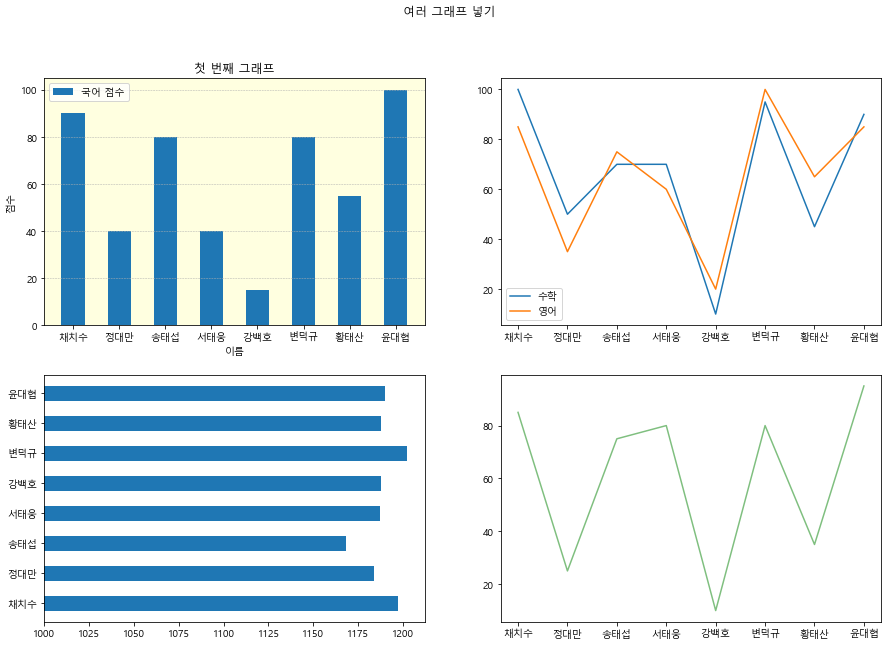

In [82]:
fig, axes = plt.subplots(2, 2, figsize = (15, 10)) # 2x2에 해당하는 plot 생성

# 첫 번째 그래프
axes[0, 0].bar(df['이름'], df['국어'], label = '국어 점수',
               width = 0.5)
axes[0, 0].legend() # 범례 설정
axes[0, 0].set_title('첫 번째 그래프') # 그래프 별 제목 설정
axes[0, 0].set(xlabel = '이름', ylabel = '점수') # x, y축 label 설정
axes[0, 0].set_facecolor('lightyellow') # 전경색 지정
axes[0, 0].grid(linestyle = '--', linewidth = '0.5', axis = 'y')

# 두 번째 그래프
axes[0, 1].plot(df['이름'], df['수학'], label = '수학')
axes[0, 1].plot(df['이름'], df['영어'], label = '영어')
axes[0, 1].legend()

# 세 번째 그래프
axes[1, 0].barh(df['이름'], df['키'],
                height = 0.5, # 막대 두께
                left = 0 # 누적 그래프 작성을 위한 입력 값
                )

# 네 번째 그래프
axes[1, 1].plot(df['이름'], df['사회'], color = 'g', alpha = 0.5)

fig.suptitle('여러 그래프 넣기') # Super Title